In [2]:
from utils import profile_predict, plot_profile, calculate_metrics
from RNN.models import EncoderDecoderGRU

In [3]:
curve_dir = {}
curve_dir[1] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/1/1_4_0_0.csv"
)
curve_dir[2] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/2/2_4_0_0.csv"
)
curve_dir[3] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/3/3_4_0_0.csv"
)
curve_dir[4] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/4/4_4_0_0.csv"
)
curve_dir[5] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/5/5_4_0_0.csv"
)
curve_dir[6] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/6/6_4_0_0.csv"
)
# pretrained_weights = "/home/mazin/Projects/Thesis/RNN/checkpoints/polar-sky-201/SEFD-monitor_val-epoch=857-train_loss=0.0000321-val_loss=0.0001363-val_mae=0.01209.ckpt"  # Best Checkpoint
# pretrained_weights = "/home/mazin/Projects/Thesis/RNN/checkpoints/polar-sky-201/SEFD-monitor_val-epoch=629-train_loss=0.0000513-val_loss=0.0004591-val_mae=0.02010.ckpt"  # For comparison with Dynaformer
# pretrained_weights = "/home/mazin/Projects/Thesis/RNN/outputs/2024-03-21/10-18-59/weights/SEFD-monitor_val-epoch=1083-train_loss=0.0000246-val_loss=0.0001742-val_mae=0.01367.ckpt"
# pretrained_weights = "/home/mazin/Projects/Thesis/RNN/outputs/2024-06-12/15-08-06/weights/avid-sea-233-epoch=40-train_loss=0.0000056-val_loss=0.0001128-val_mae=0.01011.ckpt"
pretrained_weights = "/home/mazin/Projects/Thesis/RNN/outputs/2024-06-12/15-08-06/weights/avid-sea-233-epoch=04-train_loss=0.0000063-val_loss=0.0000958-val_mae=0.00985.ckpt"

In [4]:
model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

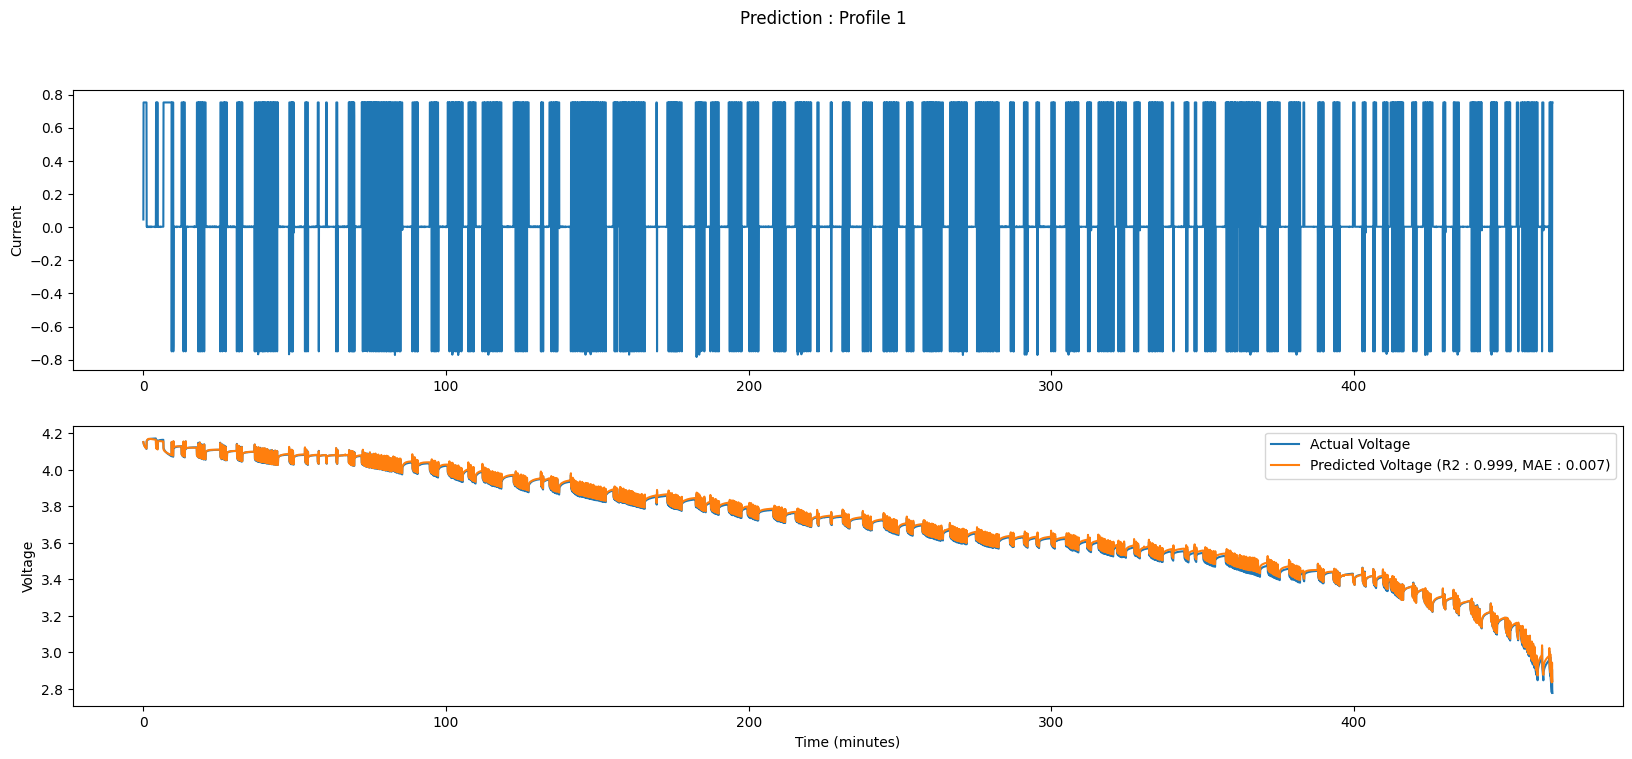

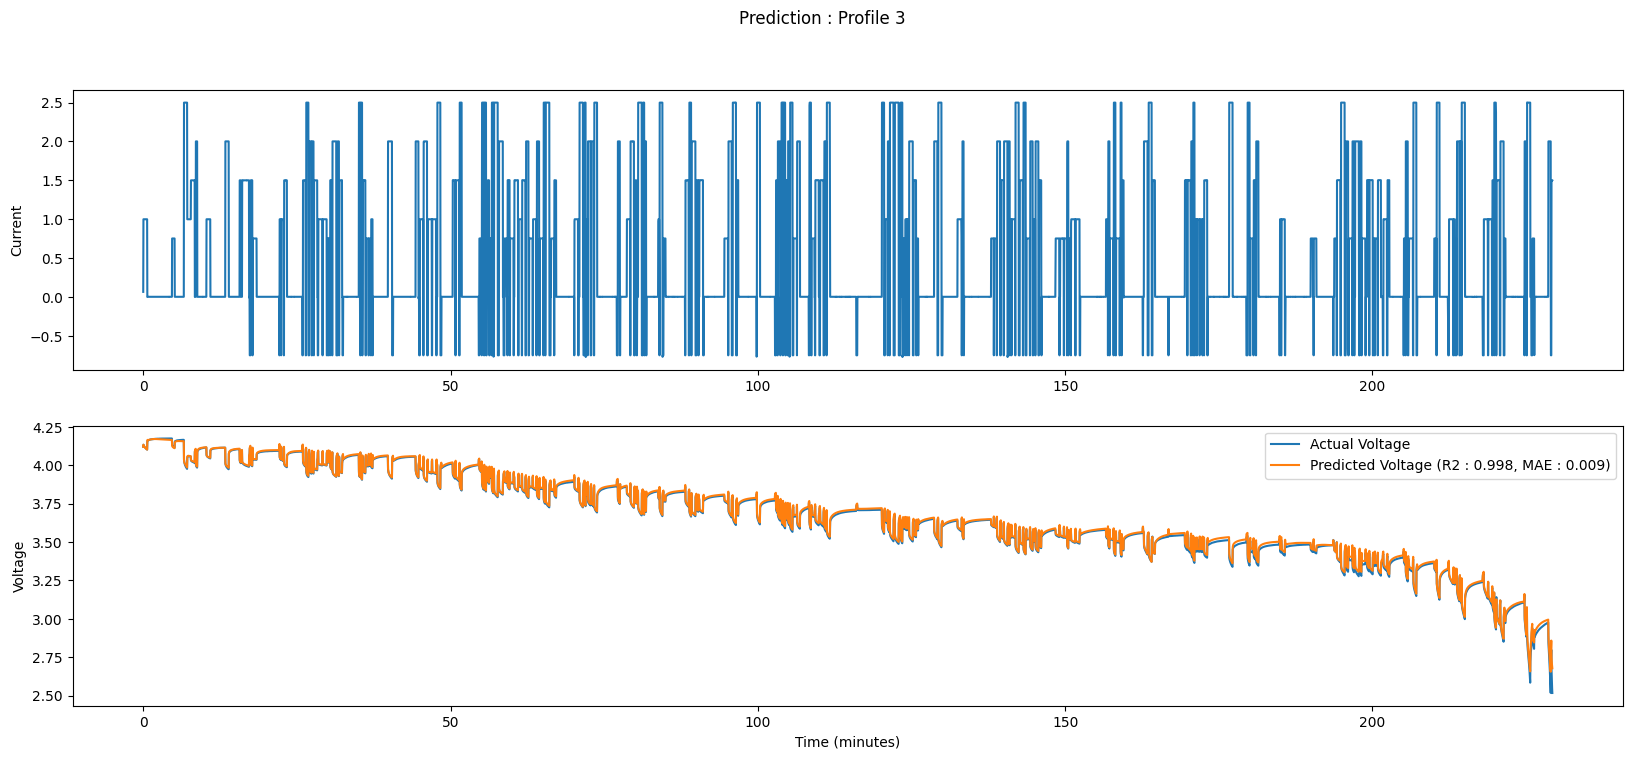

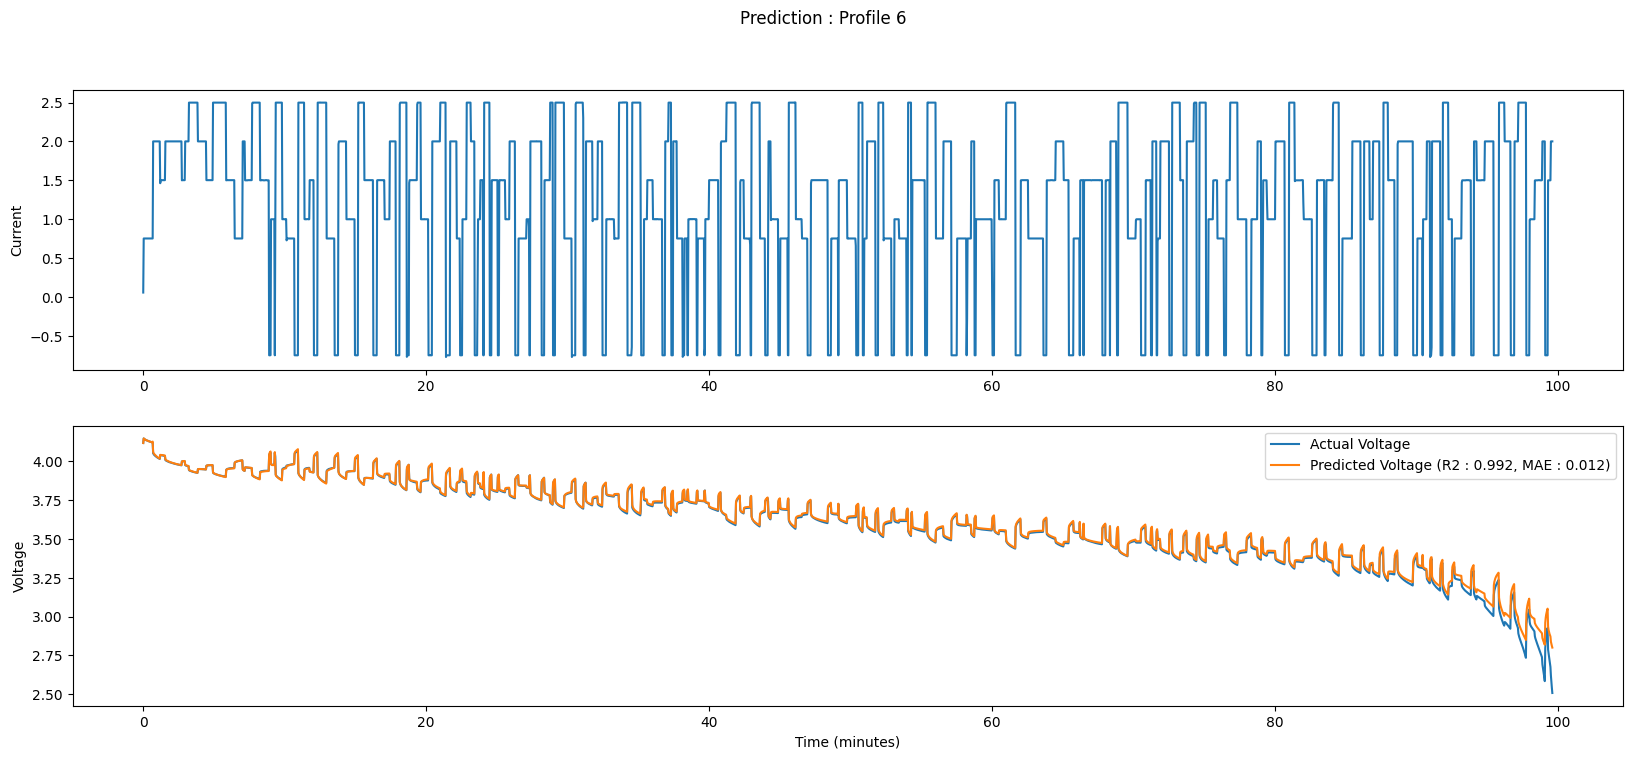

R-squared score: 0.9980992898749629
RMSE: 0.012560262
MAE: 0.00819888
MAPE: 0.0023502635


(0.9980992898749629, 0.012560262, 0.00819888, 0.0023502635)

In [5]:
# Training Metrics
actual_current_1, actual_voltage_1, predicted_voltage_1 = profile_predict(
    model, curve_dir[1], decoder_input_length=1980
)
plot_profile(
    actual_current_1,
    actual_voltage_1,
    predicted_voltage_1,
    title=f"Prediction : Profile 1",
)
actual_current_3, actual_voltage_3, predicted_voltage_3 = profile_predict(
    model, curve_dir[3], decoder_input_length=1980
)
plot_profile(
    actual_current_3,
    actual_voltage_3,
    predicted_voltage_3,
    title=f"Prediction : Profile 3",
)
actual_current_6, actual_voltage_6, predicted_voltage_6 = profile_predict(
    model, curve_dir[6], decoder_input_length=1980
)
plot_profile(
    actual_current_6,
    actual_voltage_6,
    predicted_voltage_6,
    title=f"Prediction : Profile 6",
)

calculate_metrics(
    [actual_voltage_1, actual_voltage_3, actual_voltage_6],
    [predicted_voltage_1, predicted_voltage_3, predicted_voltage_6],
)

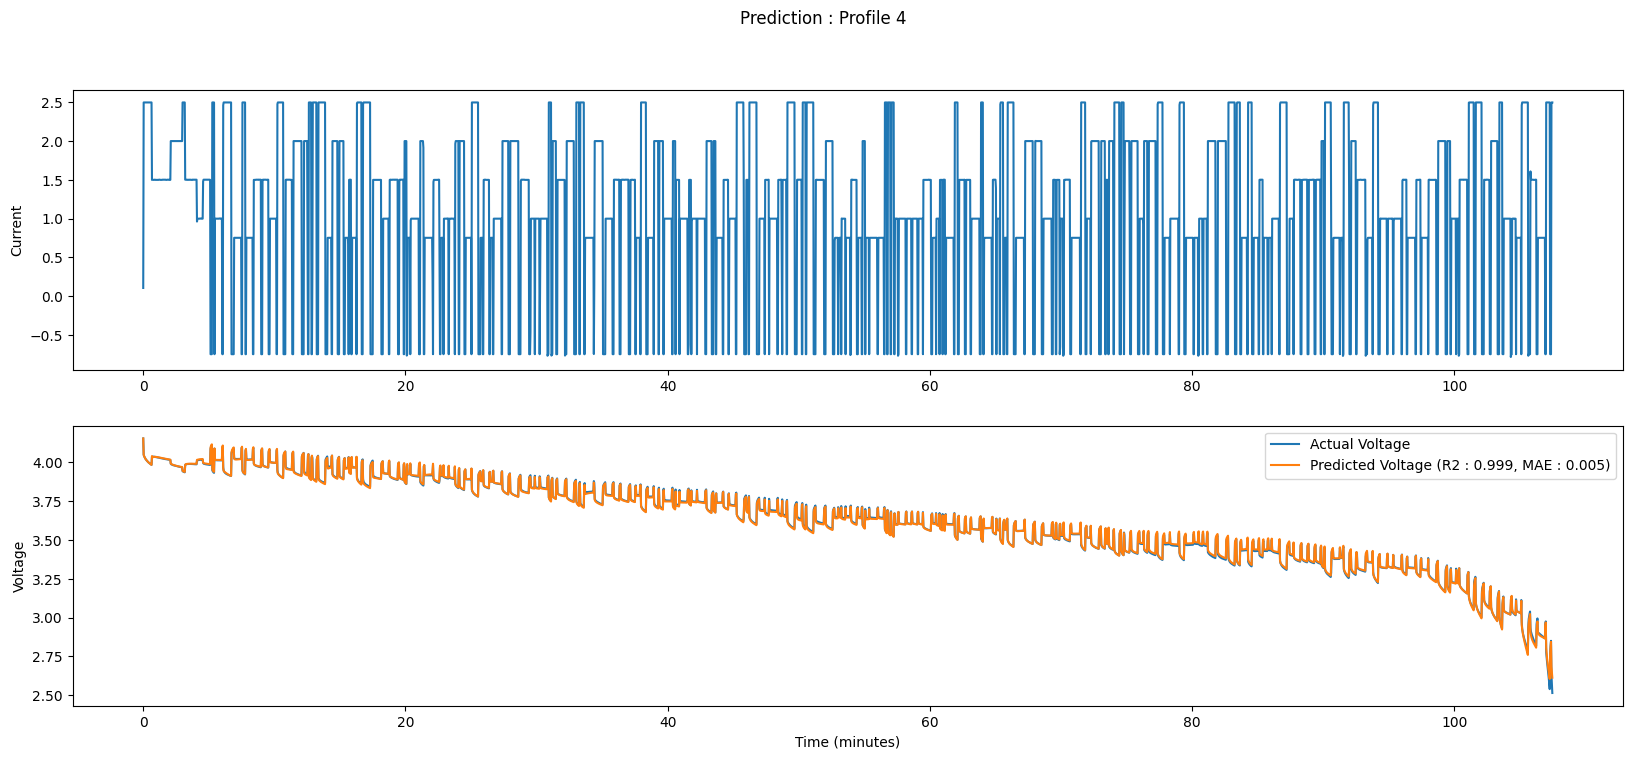

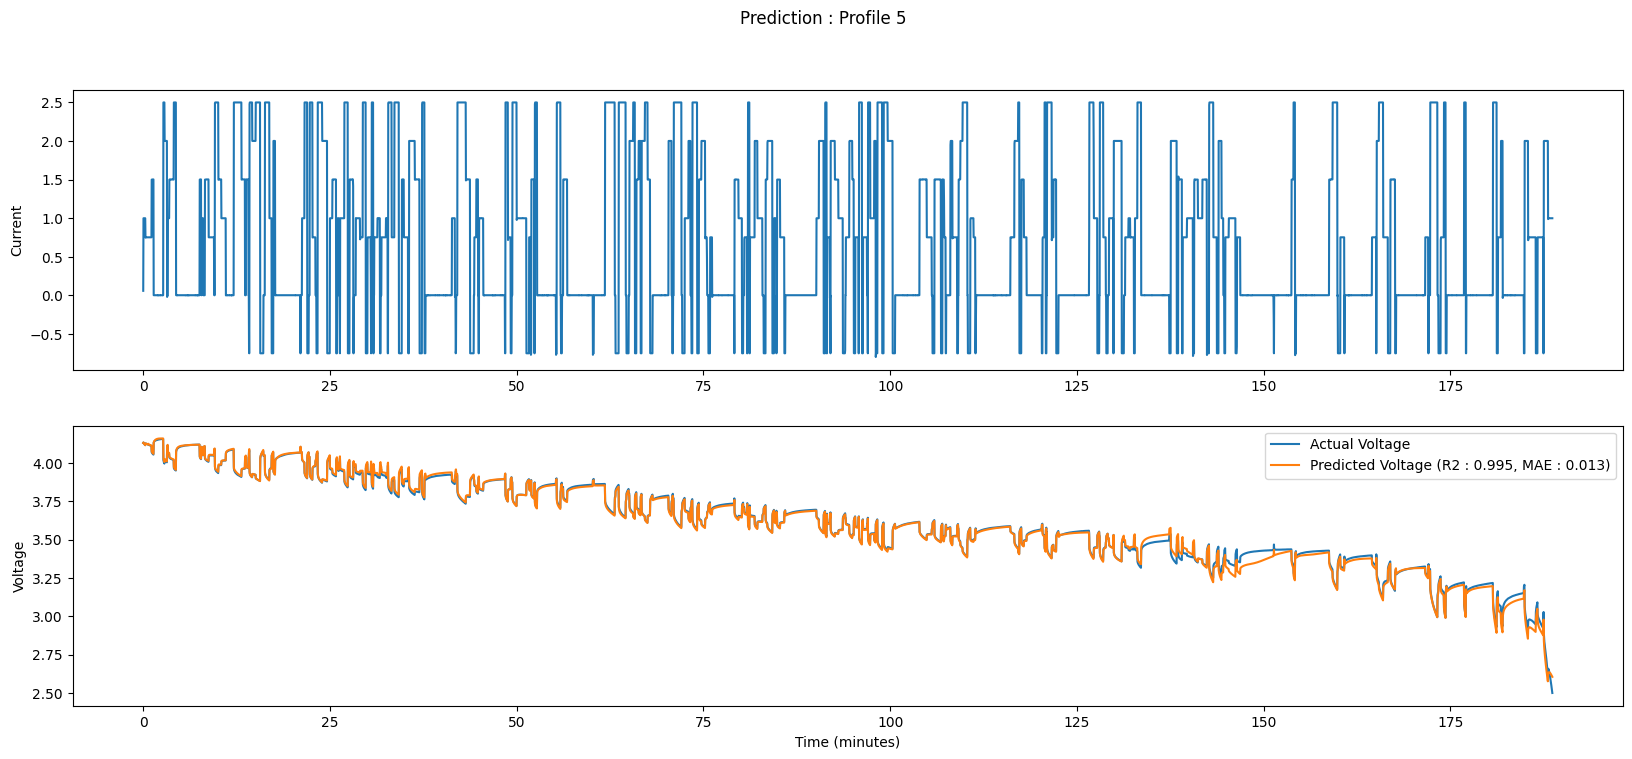

R-squared score: 0.9967026018761918
RMSE: 0.016085828
MAE: 0.009823413
MAPE: 0.002851911


(0.9967026018761918, 0.016085828, 0.009823413, 0.002851911)

In [6]:
# Validation Metrics
actual_current_4, actual_voltage_4, predicted_voltage_4 = profile_predict(
    model, curve_dir[4], decoder_input_length=1980
)
plot_profile(
    actual_current_4,
    actual_voltage_4,
    predicted_voltage_4,
    title=f"Prediction : Profile 4",
)
actual_current_5, actual_voltage_5, predicted_voltage_5 = profile_predict(
    model, curve_dir[5], decoder_input_length=1980
)
plot_profile(
    actual_current_5,
    actual_voltage_5,
    predicted_voltage_5,
    title=f"Prediction : Profile 5",
)

calculate_metrics(
    [actual_voltage_4, actual_voltage_5],
    [predicted_voltage_4, predicted_voltage_5],
)

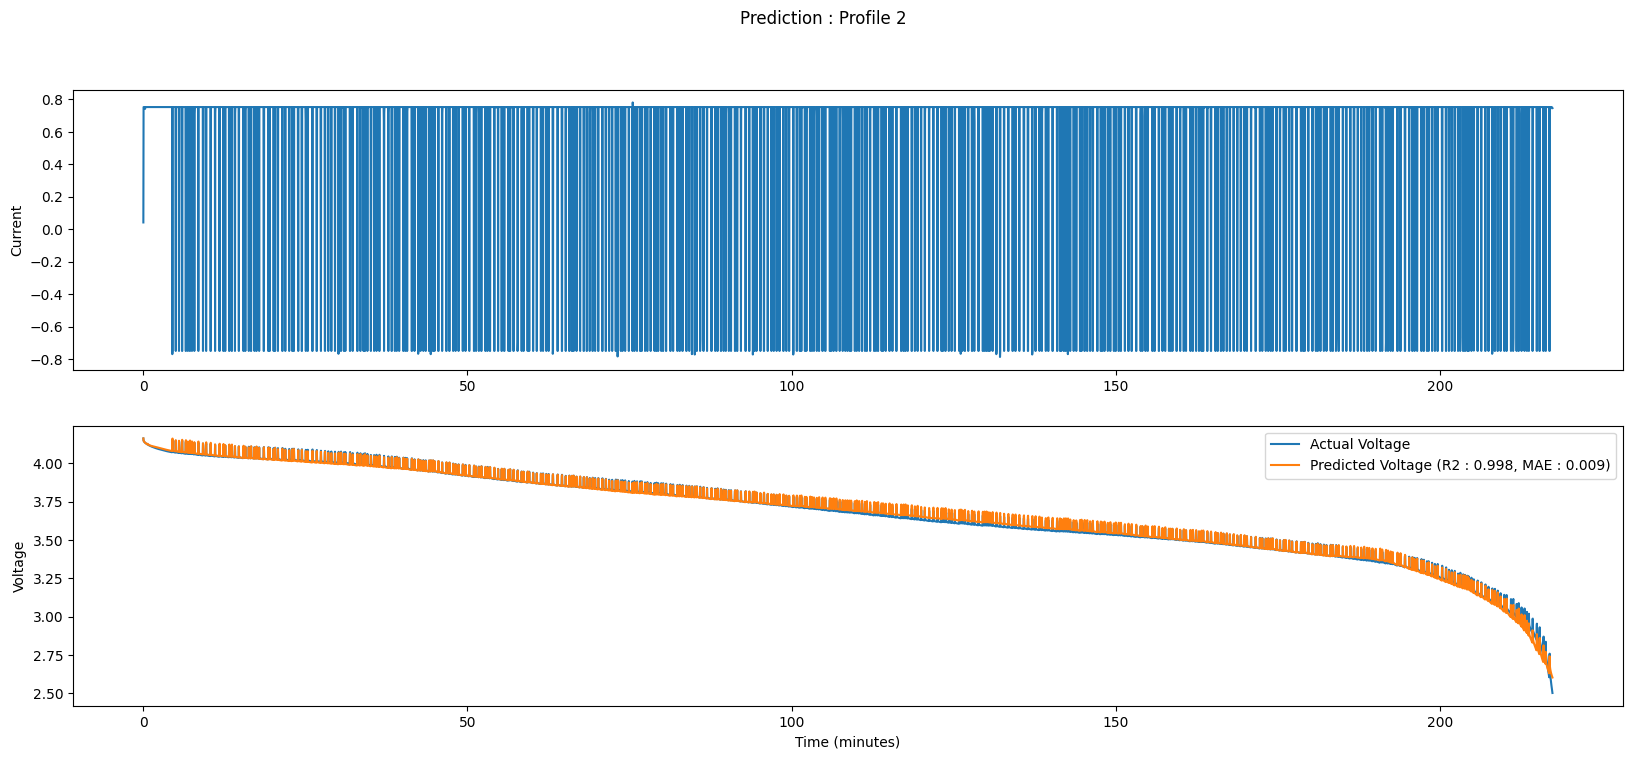

R-squared score: 0.997979493399896
RMSE: 0.01292086
MAE: 0.00869715
MAPE: 0.0025028684


(0.997979493399896, 0.01292086, 0.00869715, 0.0025028684)

In [7]:
# Test Metrics
actual_current_2, actual_voltage_2, predicted_voltage_2 = profile_predict(
    model, curve_dir[2], decoder_input_length=1980
)
plot_profile(
    actual_current_2,
    actual_voltage_2,
    predicted_voltage_2,
    title=f"Prediction : Profile 2",
)


calculate_metrics(
    [actual_voltage_2],
    [predicted_voltage_2],
)